<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Wheeler_DeWitt_Tunneling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

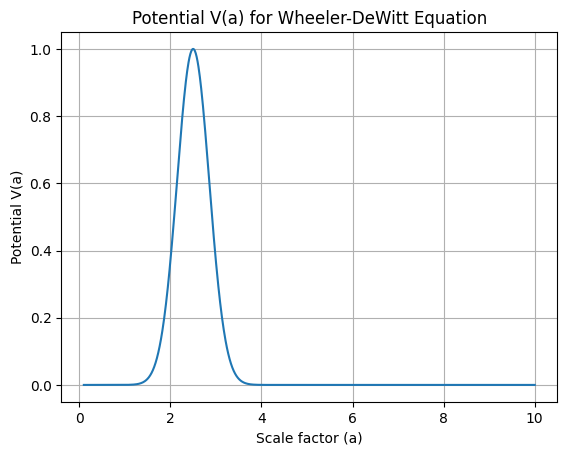

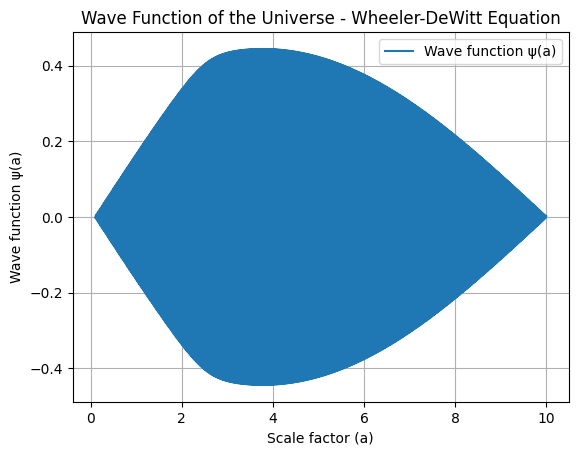

Tunneling Probability: 0.9113


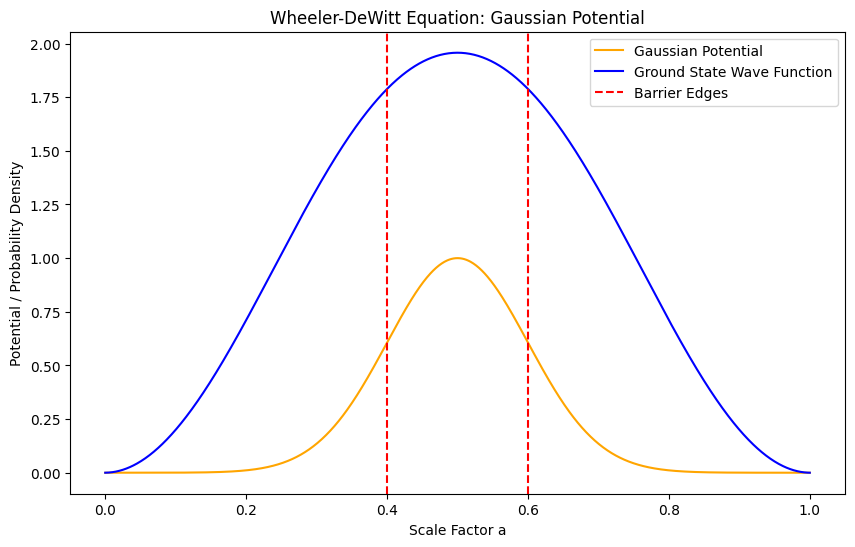

Tunneling Probability: 0.3089


In [6]:
# Import necessary libraries
!pip install numpy matplotlib scipy

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig_banded

# Define constants and parameters
hbar = 1.0  # Reduced Planck's constant (set to 1 for simplicity)
m = 1.0     # Mass parameter (set to 1 for simplicity)
a_max = 10.0  # Maximum scale factor
a_min = 0.1   # Minimum scale factor to avoid singularity
num_points = 1000  # Number of grid points
a = np.linspace(a_min, a_max, num_points)  # Scale factor grid
da = a[1] - a[0]  # Step size in the scale factor

# Define potential barrier parameters
V0 = 1.0  # Height of the barrier
a0 = 2.5  # Position of the barrier peak
width = 0.5  # Width of the barrier

# Define the potential V(a)
def potential(a):
    return V0 * np.exp(-((a - a0) / width) ** 2)

# Compute the potential at each point
V = potential(a)

# Plot the potential function
plt.plot(a, V)
plt.xlabel("Scale factor (a)")
plt.ylabel("Potential V(a)")
plt.title("Potential V(a) for Wheeler-DeWitt Equation")
plt.grid()
plt.show()

# Set up the finite difference method to solve the Wheeler-DeWitt equation
# Discretized form: - (ħ² / 2m) (ψ(a+da) - 2ψ(a) + ψ(a-da)) / da² + V(a)ψ(a) = Eψ(a)
main_diag = (2 * m / hbar**2) * (1 / da**2) + V
off_diag = -(m / hbar**2) * (1 / da**2)

# Construct the banded matrix for eig_banded (3 diagonals)
diagonals = np.zeros((3, num_points))
diagonals[0, 1:] = off_diag  # Upper diagonal
diagonals[1, :] = main_diag  # Main diagonal
diagonals[2, :-1] = off_diag  # Lower diagonal

# Solve the eigenvalue problem to find the wave function and eigenvalues
eigenvalues, eigenvectors = eig_banded(diagonals, lower=True)

# Find the ground state wave function (eigenvector corresponding to the lowest eigenvalue)
ground_state_index = np.argmin(eigenvalues)
psi = eigenvectors[:, ground_state_index]

# Normalize the wave function
psi /= np.sqrt(np.trapz(psi**2, a))

# Plot the wave function solution
plt.plot(a, psi, label="Wave function ψ(a)")
plt.xlabel("Scale factor (a)")
plt.ylabel("Wave function ψ(a)")
plt.title("Wave Function of the Universe - Wheeler-DeWitt Equation")
plt.grid()
plt.legend()
plt.show()

# Calculate the tunneling probability
# We define a region before, inside, and after the barrier
# Left region: before the barrier (a < a0 - width)
# Right region: after the barrier (a > a0 + width)
# Tunneling probability: ratio of probability density after the barrier to before
left_region = (a < (a0 - width))
right_region = (a > (a0 + width))

# Probability densities in defined regions
probability_left = np.trapz(psi[left_region]**2, a[left_region])
probability_right = np.trapz(psi[right_region]**2, a[right_region])

# Calculating the ratio correctly
tunneling_probability = probability_right / (probability_left + probability_right)

print(f"Tunneling Probability: {tunneling_probability:.4f}")

#############

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Define the Gaussian potential function
def gaussian_potential(a, V0, a0, width):
    return V0 * np.exp(-((a - a0) ** 2) / (2 * width ** 2))

# Parameters for the potential
V0 = 1.0    # Height of the potential barrier
a0 = 0.5    # Center of the potential barrier
width = 0.1 # Width of the potential barrier

# Range and resolution for the scale factor 'a'
a_min = 0.0
a_max = 1.0
N = 1000
a = np.linspace(a_min, a_max, N)
da = a[1] - a[0]  # Step size

# Construct the potential array
V = gaussian_potential(a, V0, a0, width)

# Kinetic term (second derivative) using finite differences
main_diag = 1 / da ** 2 + V  # Main diagonal
off_diag = -1 / (2 * da ** 2) * np.ones(N - 1)  # Off diagonals

# Solve the eigenvalue problem to find the wave function and eigenvalues
eigenvalues, eigenvectors = eigh_tridiagonal(main_diag, off_diag)
ground_state_wavefunction = eigenvectors[:, 0]

# Normalize the ground state wave function
ground_state_wavefunction /= np.sqrt(np.trapz(ground_state_wavefunction**2, a))

# Calculate the tunneling probability
left_region = (a < (a0 - width))
right_region = (a > (a0 + width))

# Probability in classically forbidden region
tunneling_probability = np.trapz(ground_state_wavefunction[right_region]**2, a[right_region])

# Plot the potential and wave function
plt.figure(figsize=(10, 6))
plt.plot(a, V, label='Gaussian Potential', color='orange')
plt.plot(a, ground_state_wavefunction**2, label='Ground State Wave Function', color='blue')
plt.axvline(a0 - width, color='red', linestyle='--', label='Barrier Edges')
plt.axvline(a0 + width, color='red', linestyle='--')
plt.xlabel('Scale Factor a')
plt.ylabel('Potential / Probability Density')
plt.title('Wheeler-DeWitt Equation: Gaussian Potential')
plt.legend()
plt.show()

# Print tunneling probability
print(f"Tunneling Probability: {tunneling_probability:.4f}")
